In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import glob as glob
import os
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
font = {'size'   : 15}
matplotlib.rc('font', **font)

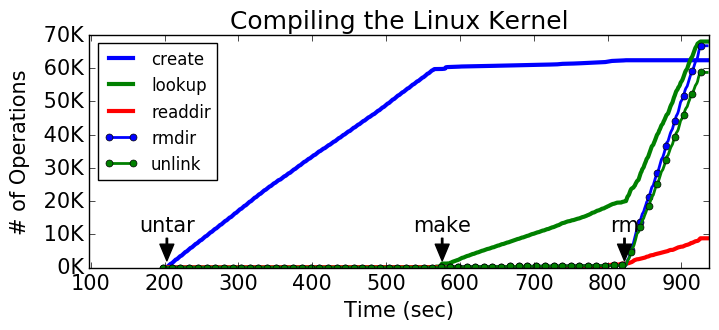

In [13]:
def clean(df):
    del df['index']
    df = df[df['time'] != 0]
    return df

def to_seconds(timestamp):
    ts = timestamp.split(':')
    return int(float(ts[0])*60*60 + float(ts[1])*60 + float(ts[2]))

df = clean(pd.read_csv('../results/req_create.wsp.out', skiprows=13, names=["index", "time",'create']))
for req in ['readdir', 'lookup', 'unlink', 'rmdir']:
    d  = clean(pd.read_csv('../results/req_'+req+'.wsp.out', skiprows=13, names=["index", "time", req]))
    df = pd.merge(df, d, on='time')
df = df[df['create'] > 11] # lop of the beginning of the trace

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
df.plot(ax=ax, y=['create', 'lookup', 'readdir'], x='time', lw=3)
df.plot(ax=ax, y=['rmdir', 'unlink'], colors=['blue', 'green'], x='time', lw=2, marker='o', markersize=5, markevery=10)

# plot the job phases
cursor = int(df['time'].head(1))
runtimes = pd.read_csv('../results/compile-threads-4-issdm-0-2017-11-10-20:02:55.txt')
runtimes['label'] = ['download', 'untar', 'make\nallnoconfig', 'make', 'ls -alh', 'rm']
for index, row in runtimes.iterrows():
    sec = to_seconds(row['delta'])
    if row['label'] in ['untar', 'make', 'rm']:
        prop = dict(facecolor='black', width=1, headwidth=10)
        ax.annotate(row['label'], arrowprops=prop, ha="center", xy=(cursor, 2000), xytext=(cursor, 11000))
    cursor += sec
ax.set_xlim(1510373598 - 100, 1510373598 + 740)

ax.set_yticklabels(['{:3.0f}K'.format(y/1000) for y in ax.get_yticks()])
ax.set_xticklabels(range(0, 1000, 100))
ax.set_xlabel("Time (sec)")
ax.set_ylabel("# of Operations")
ax.set_title("Compiling the Linux Kernel")
ax.legend(fontsize=12, loc='upper left')
fig.savefig('graphs/compile-ops.png', bbox_inches='tight', dpi=400)